In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from skimage import io, img_as_float32, util, color, transform, filters

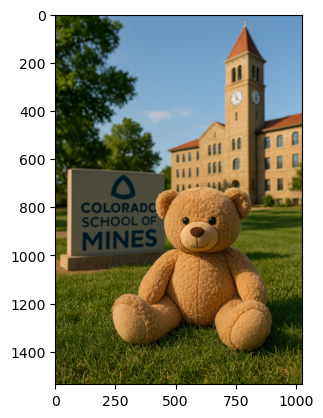

In [2]:
img_rgb = io.imread('data/Mines_Teddy_Bear.png')
plt.imshow(img_rgb)

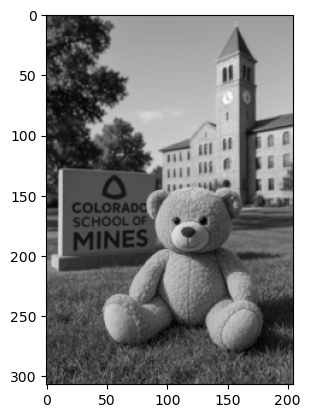

In [3]:
img_gray = img_as_float32(color.rgb2gray(img_rgb))
img = transform.rescale(img_gray, 1/5)
plt.imshow(img, cmap="gray")

### Laplacian pyramid

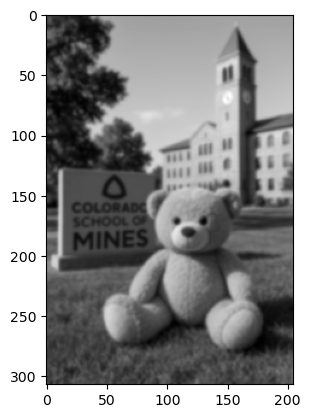

In [4]:
img1 = copy.deepcopy(img)
img1_filt = filters.gaussian(img1, sigma=1)
plt.imshow(img1_filt, cmap='gray')

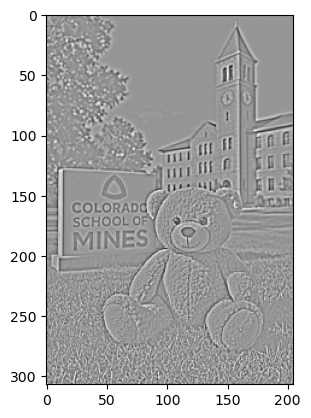

In [5]:
img1_res = img1 - img1_filt
plt.imshow(img1_res+0.5, cmap='gray')

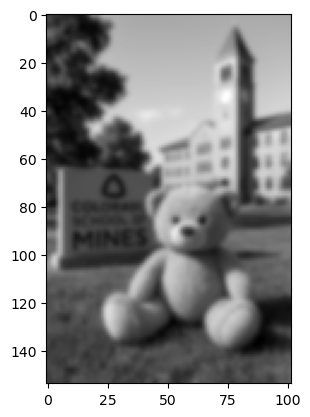

In [6]:
img2 = transform.rescale(img1, 0.5, anti_aliasing=False)
img2_filt = filters.gaussian(img2, sigma=1)
plt.imshow(img2_filt, cmap='gray')

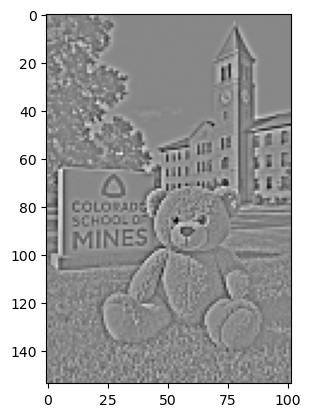

In [7]:
img2_res = img2 - img2_filt
plt.imshow(img2_res+0.5, cmap='gray')

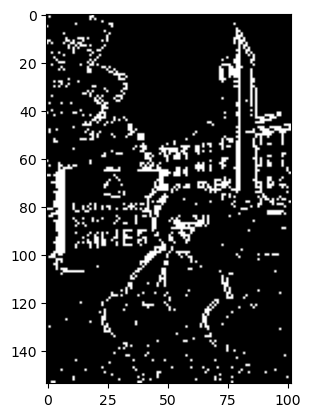

In [8]:
# show edges
plt.imshow(np.logical_or(img2_res>0.07, img2_res<-0.07), cmap='gray')

### Fourier Transform

In [9]:
from scipy.fft import fft2, fftshift

24519.996
0.007839619


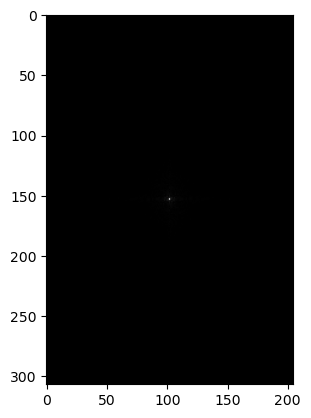

In [10]:
img_fur = fftshift(fft2(img))
img_fur_mag = np.abs(img_fur)
img_fur_pha = np.angle(img_fur)

plt.imshow(img, cmap='gray')
plt.imshow(img_fur_mag, cmap='gray')
print(img_fur_mag.max())
print(img_fur_mag.min())
# img_fur_mag

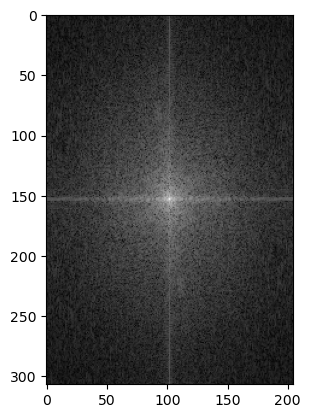

In [11]:
# Apply log transform for better visibility
img_fur_mag_log = np.log(1+img_fur_mag) # add 1 to avaoid log(0)
plt.imshow(img_fur_mag_log, cmap='gray')

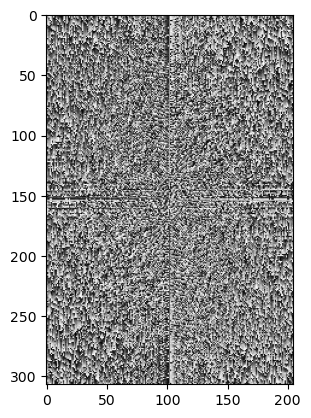

In [12]:
plt.imshow(img_fur_pha, cmap='gray')

### Reconstruct Image from Fourier Transform

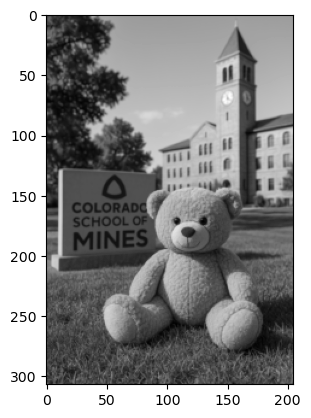

In [13]:
img_reconst = np.fft.ifft2(img_fur)
img_reconst = np.abs(img_reconst) # remove small imaginary parts due to numerical errors
plt.imshow(img_reconst, cmap='gray')

### Filtering in frequency domain

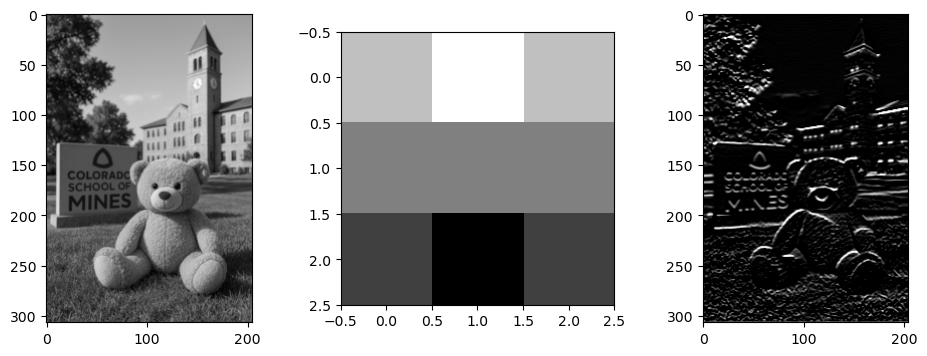

In [65]:
# convert image type to use with PIL library filtering
from PIL import Image, ImageFilter
img_pil = Image.fromarray(util.img_as_ubyte(img))

ker = np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]])
ker_list = ker.flatten().tolist()

img_pil_filt = img_pil.filter(ImageFilter.Kernel((3,3), ker_list, scale=1, offset=0))
img_filt = np.array(img_pil_filt).astype(np.float32)
img_filt = img_filt / 255

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(ker, cmap='gray')
ax[2].imshow(img_filt, cmap='gray')

307 205


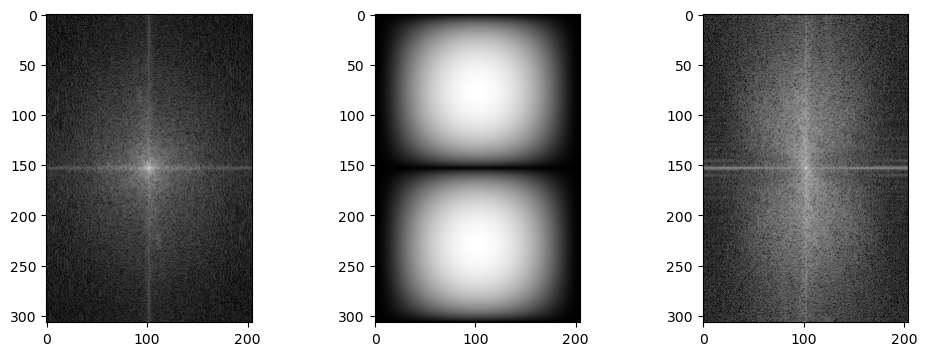

In [ ]:
# expand filter image to match input image
nx, ny = img.shape
ker_img = np.zeros((nx,ny))
print(nx, ny)
mx = nx//2; my = ny//2
ker_img[mx:mx+3, my:my+3] = ker

ker_ft_mag_log = np.log( 1+ np.abs(fftshift(fft2(ker_img))) ) ## FT of filter kernel
img_filt_ft_mag_log = np.log( 1+ np.abs(fftshift(fft2(img_filt))) ) ## FT of output image

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].imshow(img_fur_mag_log / img_fur_mag_log.max(), cmap='gray') # normalize by dividing max for better visuals
ax[1].imshow(ker_ft_mag_log, cmap='gray')
ax[2].imshow(img_filt_ft_mag_log / img_filt_ft_mag_log.max(), cmap='gray')
